In [1]:
from matplotlib import pyplot as plt 

import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import os

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# First step we will start with EDA

---



In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
train_data["split"] = "train"

test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
test_data["split"] = "test"

valid_data = pd.read_csv('/content/drive/MyDrive/valid.csv')
valid_data["split"] = "valid"

data = pd.concat([train_data, test_data, valid_data], ignore_index=True)


In [4]:
data.head()

,FileName,ShowName,FullFileLength,SegmentID,SegmentLength,SegmentStart,SegmentEnd,SpeakerAge,SpeakerGender,SpeakerDialect,Speaker,Environment,GroundTruthText,ProcessedText,split
0,batch_4/6k_v_SBA_688_2.wav,حكايات بابا فرحان - 02 - 18,488.83,6k_v_SBA_688_2-seg_0_430-28_830,28.40,0.43,28.83,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,Noisy -- ضوضاء,#غير_واضح وجربتوا ولا شي قولوا لي على طول عشان...,غيرواضح وجربتوا ولا شي قولوا لي على طول عشان ا...,train
1,batch_4/6k_v_SBA_688_2.wav,حكايات بابا فرحان - 02 - 18,488.83,6k_v_SBA_688_2-seg_30_880-39_650,8.77,30.88,39.65,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,Noisy -- ضوضاء,لا خلاص خلوا بالكم خلوا بالكم #غير_واضح لحظة #...,لا خلاص خلوا بالكم خلوا بالكم غيرواضح لحظة غير...,train
2,batch_4/6k_v_SBA_688_2.wav,حكايات بابا فرحان - 02 - 18,488.83,6k_v_SBA_688_2-seg_53_970-80_140,26.17,53.97,80.14,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,Clean -- نظيف,متأكد إيوه يا عيد طيب خلاص إلا قولي يا عيد أنت...,متاكد ايوه يا عيد طيب خلاص الا قولي يا عيد انت...,train
3,batch_4/6k_v_SBA_688_2.wav,حكايات بابا فرحان - 02 - 18,488.83,6k_v_SBA_688_2-seg_82_240-87_410,5.17,82.24,87.41,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,Noisy -- ضوضاء,أم الخير أم الخير فين رايحة رايحة ألعب كورة يا...,ام الخير ام الخير فين رايحة رايحة العب كورة يا...,train
4,batch_4/6k_v_SBA_688_2.wav,حكايات بابا فرحان - 02 - 18,488.83,6k_v_SBA_688_2-seg_90_460-96_670,6.21,90.46,96.67,Adult -- بالغ,Female,Najdi,Speaker1متحدث,Clean -- نظيف,أيوه يا سمورة مهم عيد وسعيد بيشتغلوا وأنا رايح...,ايوه يا سمورة مهم عيد وسعيد بيشتغلوا وانا رايح...,train


In [5]:
# Dataset size
print(" dataset size:", len(data))


 dataset size: 103895


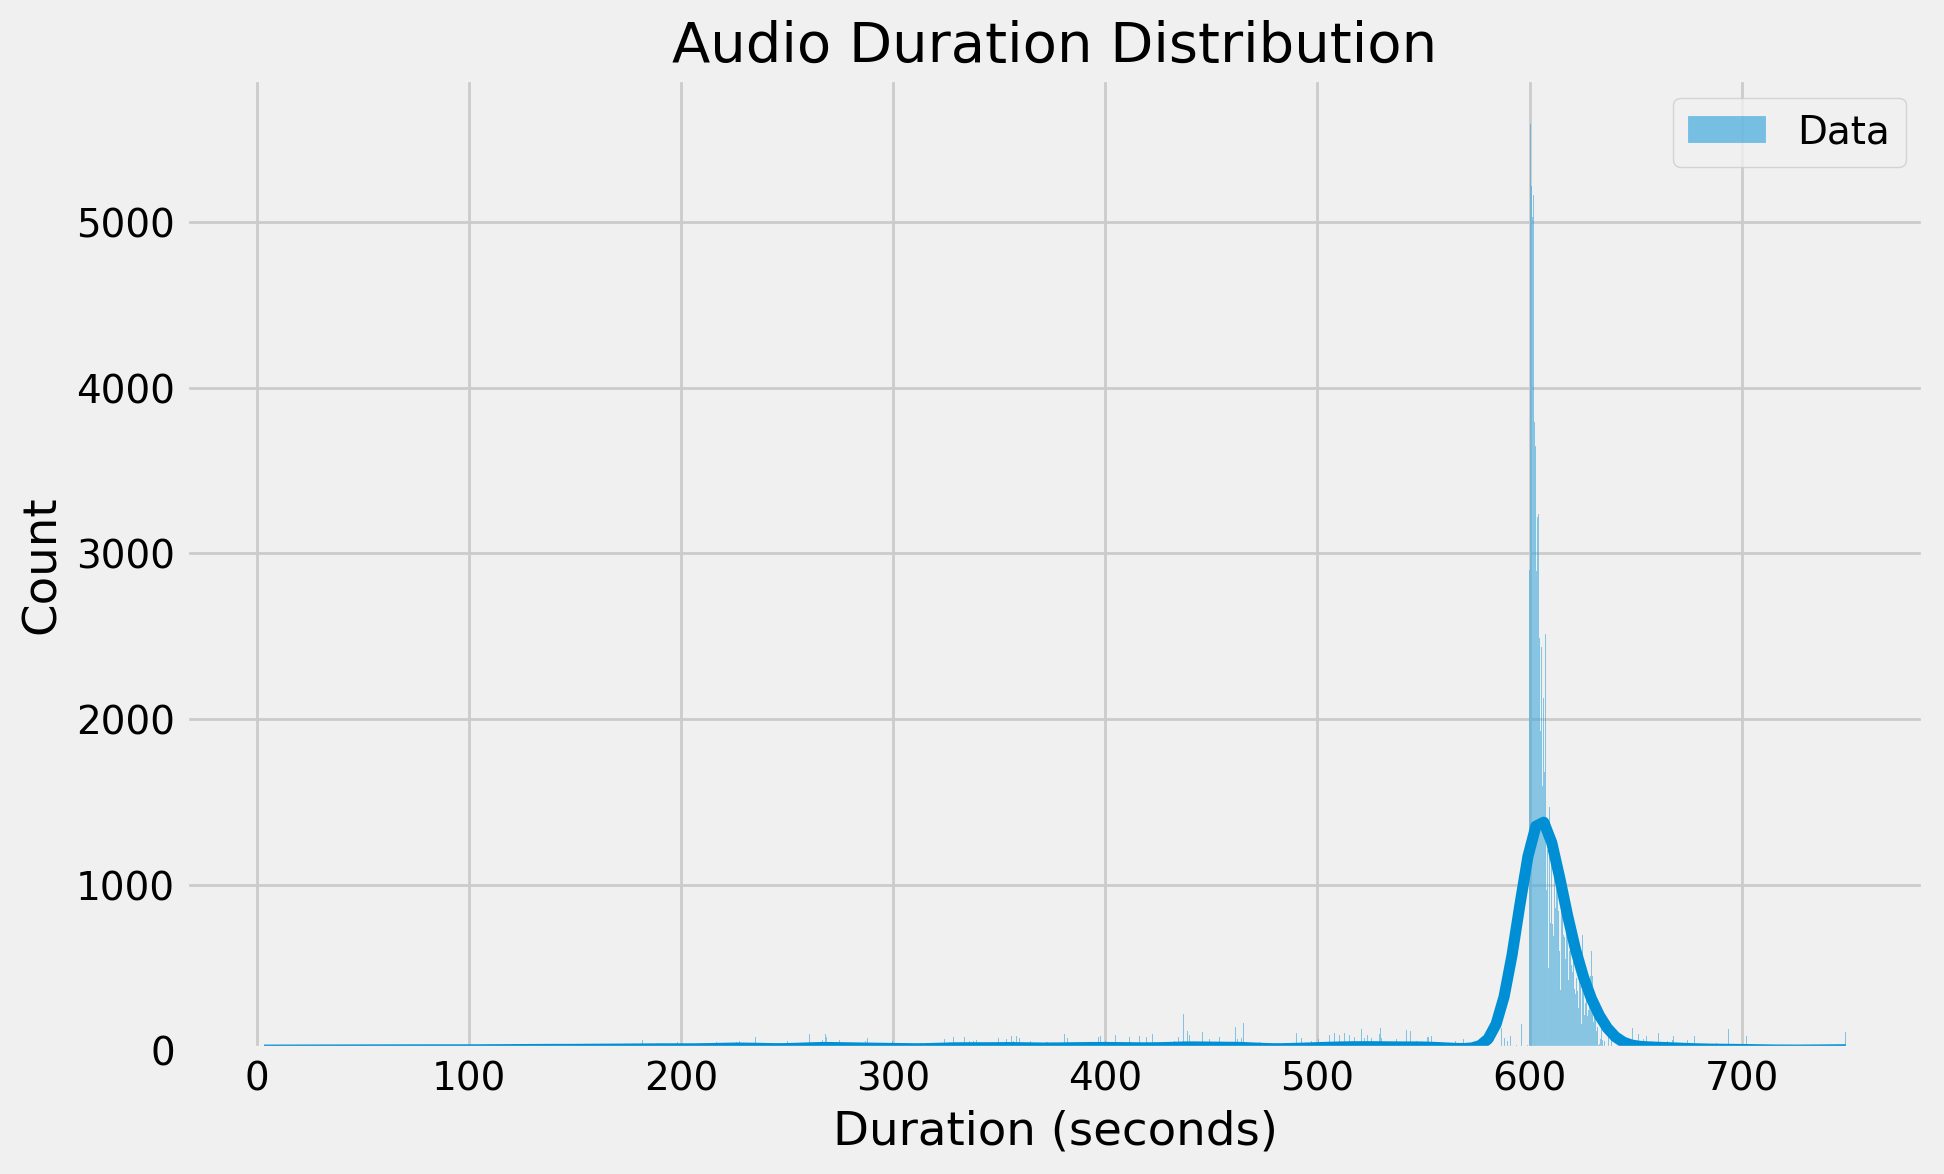

In [6]:
# Visualize transcript length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['FullFileLength'], kde=True, label='Data')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.legend()
plt.title('Audio Duration Distribution')
plt.show()

In [7]:
def print_summary_stats(data, label):
    print(f"--- {label} dataset summary statistics ---")
    print(f"Minimum duration: {data['FullFileLength'].min()}")
    print(f"Maximum duration: {data['FullFileLength'].max()}")
    print(f"Mean duration: {data['FullFileLength'].mean()}")
    print(f"Standard deviation: {data['FullFileLength'].std()}")
    print()

print_summary_stats(data, "Data")



--- Data dataset summary statistics ---
Minimum duration: 3.2799999999999727
Maximum duration: 749.1500000000002
Mean duration: 579.8039520284902
Standard deviation: 91.27375417770656



In [8]:
total_duration_seconds = data['SegmentLength'].sum()
total_duration_hours = total_duration_seconds / 3600


In [9]:
total_duration_hours

139.48735912967192

# We are checking the transcript_length column is particularly important in speech recognition tasks as it indicates the length of the transcript associated with each audio file. Inaccurate or unusual transcript lengths can be an indication of errors in the dataset or the speech recognition process. Additionally, transcript length can affect the model's performance, so it's important to ensure that the dataset has a balanced distribution of transcript lengths. Therefore, it's important to identify and handle outliers in the transcript_length column.

In [10]:
# Analyze transcript length
data['transcript_length'] = data['ProcessedText'].str.len()


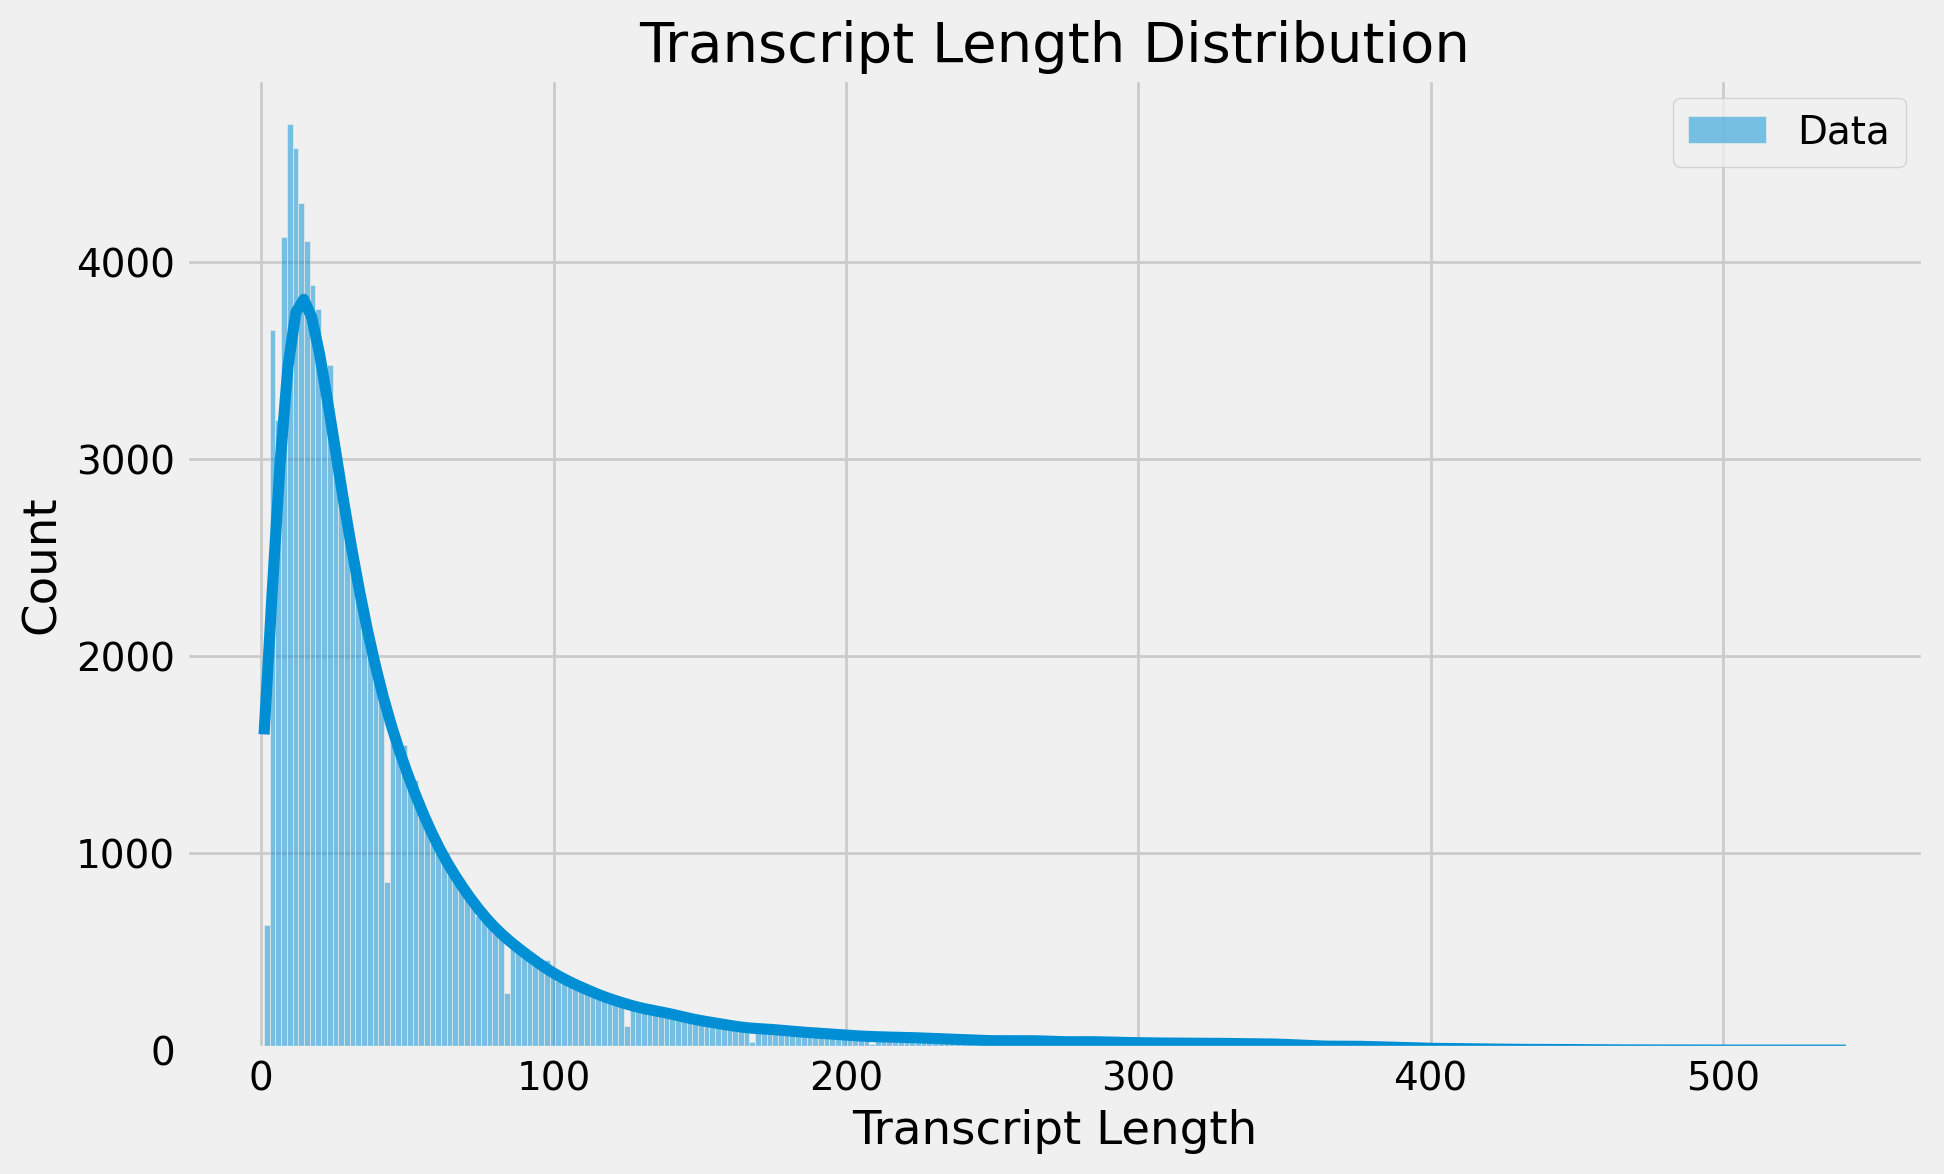

In [11]:
# Visualize transcript length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['transcript_length'], kde=True, label='Data')
plt.xlabel('Transcript Length')
plt.ylabel('Count')
plt.legend()
plt.title('Transcript Length Distribution')
plt.show()

In [12]:
def find_outliers(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1 
  lower_bound = Q1 -1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers

data_outliers = find_outliers(data['transcript_length'])


print("dataset outliers:\n", data_outliers)


dataset outliers:
 0         336.0
2         306.0
5         282.0
13        383.0
21        164.0
          ...  
103867    203.0
103871    237.0
103874    304.0
103878    150.0
103882    324.0
Name: transcript_length, Length: 8774, dtype: float64


In [13]:
#filtering the DataFrame to show only the rows where the transcript length is equal to one of the outlier values
data['transcript_length'] = data['ProcessedText'].str.len()
outliers = data[data['transcript_length'].isin(data['transcript_length'].value_counts().tail(10).index)]
print(outliers)

                           FileName                                  ShowName  \
11671   batch_3/6k_v_SBA_1762_0.wav                  طاش ما طاش - 06 - المؤذن   
12588  batch_1/6k_v_SBA2_2176_4.wav                        الديرة -23-04-2021   
12614    batch_4/6k_v_SBA_928_0.wav                 طاش ما طاش - 05 - الخادمة   
12794  batch_1/6k_v_SBA2_2152_0.wav                         احب السعودية - 05   
13281  batch_1/6k_v_SBA2_2262_4.wav                        الديرة -18-04-2021   
13679  batch_1/6k_v_SBA2_2037_4.wav                      الديرة -03-05-2021_1   
14551  batch_1/6k_v_SBA2_2023_0.wav                         احب السعودية - 12   
15096    batch_4/6k_v_SBA_307_1.wav               حكايات بابا فرحان - 04 - 18   
15723    batch_4/6k_v_SBA_359_1.wav  حكايات بابا فرحان - كنز سرحان الأول - 21   
99813  batch_1/6k_v_SBA2_2034_3.wav           برنامج اخر الأسبوع 29-03-1424 ه   

       FullFileLength                             SegmentID  SegmentLength  \
11671          616.62   6k_v_S

In [14]:
base_path = '/content/drive/MyDrive/SADA_DATASETS/'
batch_folders = ['batch_1', 'batch_2', 'batch_3', 'batch_4']

for batch_folder in batch_folders:
    folder_path = os.path.join(base_path, batch_folder)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):
            full_path = os.path.join(folder_path, file_name)
            # Process the audio file (e.g., loading the audio with librosa)
            signal, sample_rate = librosa.load(full_path)
            # Perform your analysis and processing here

Text(0.5, 1.0, 'Waveform')

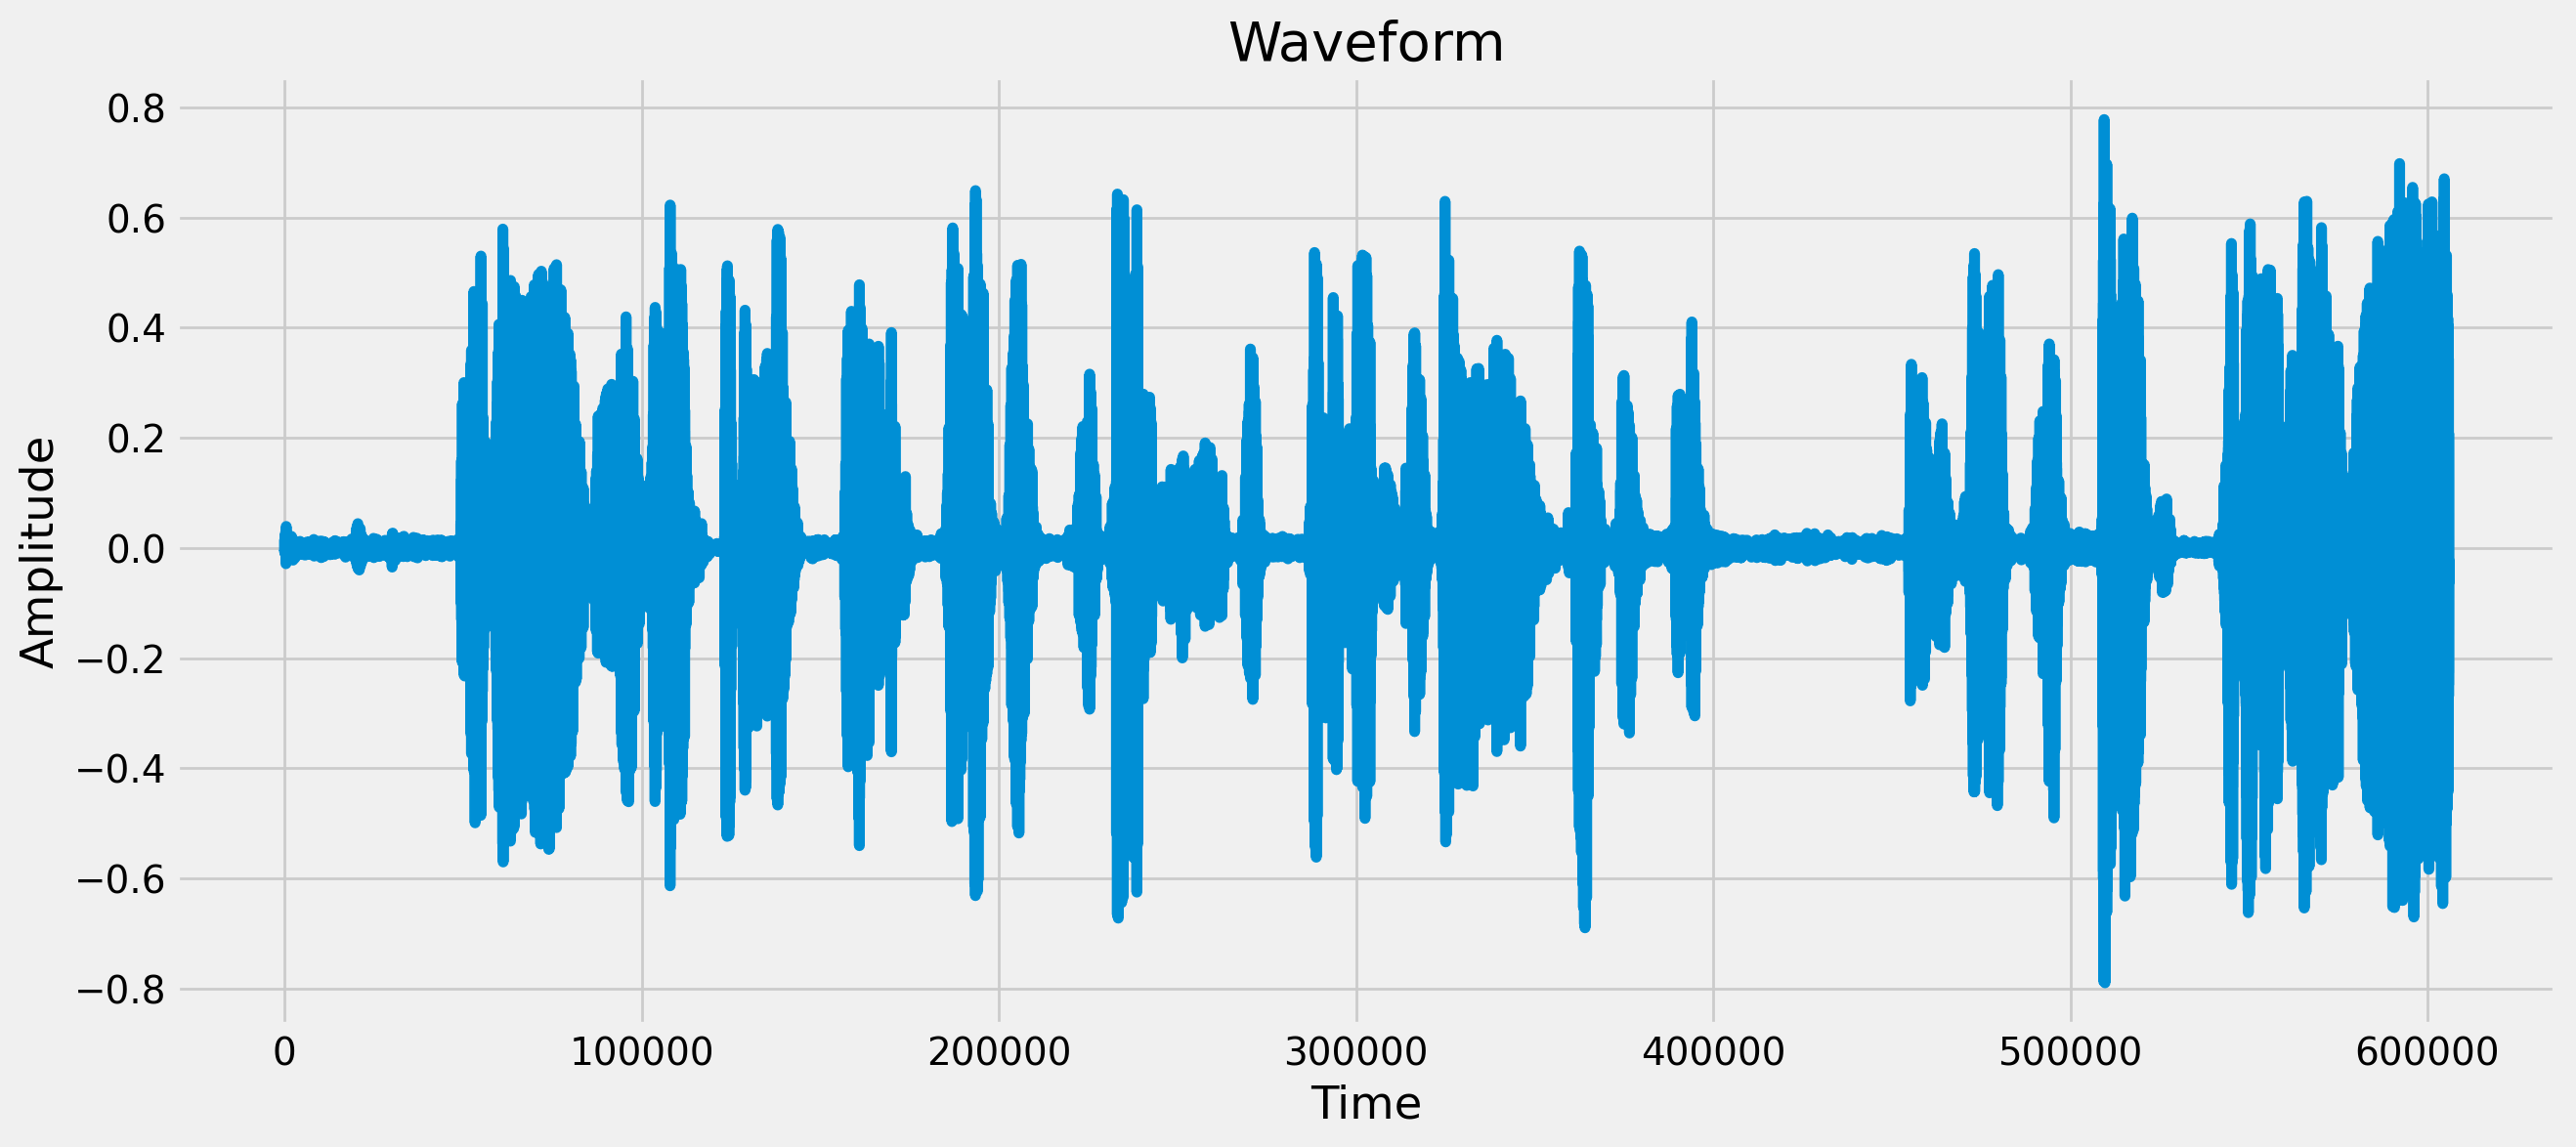

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')

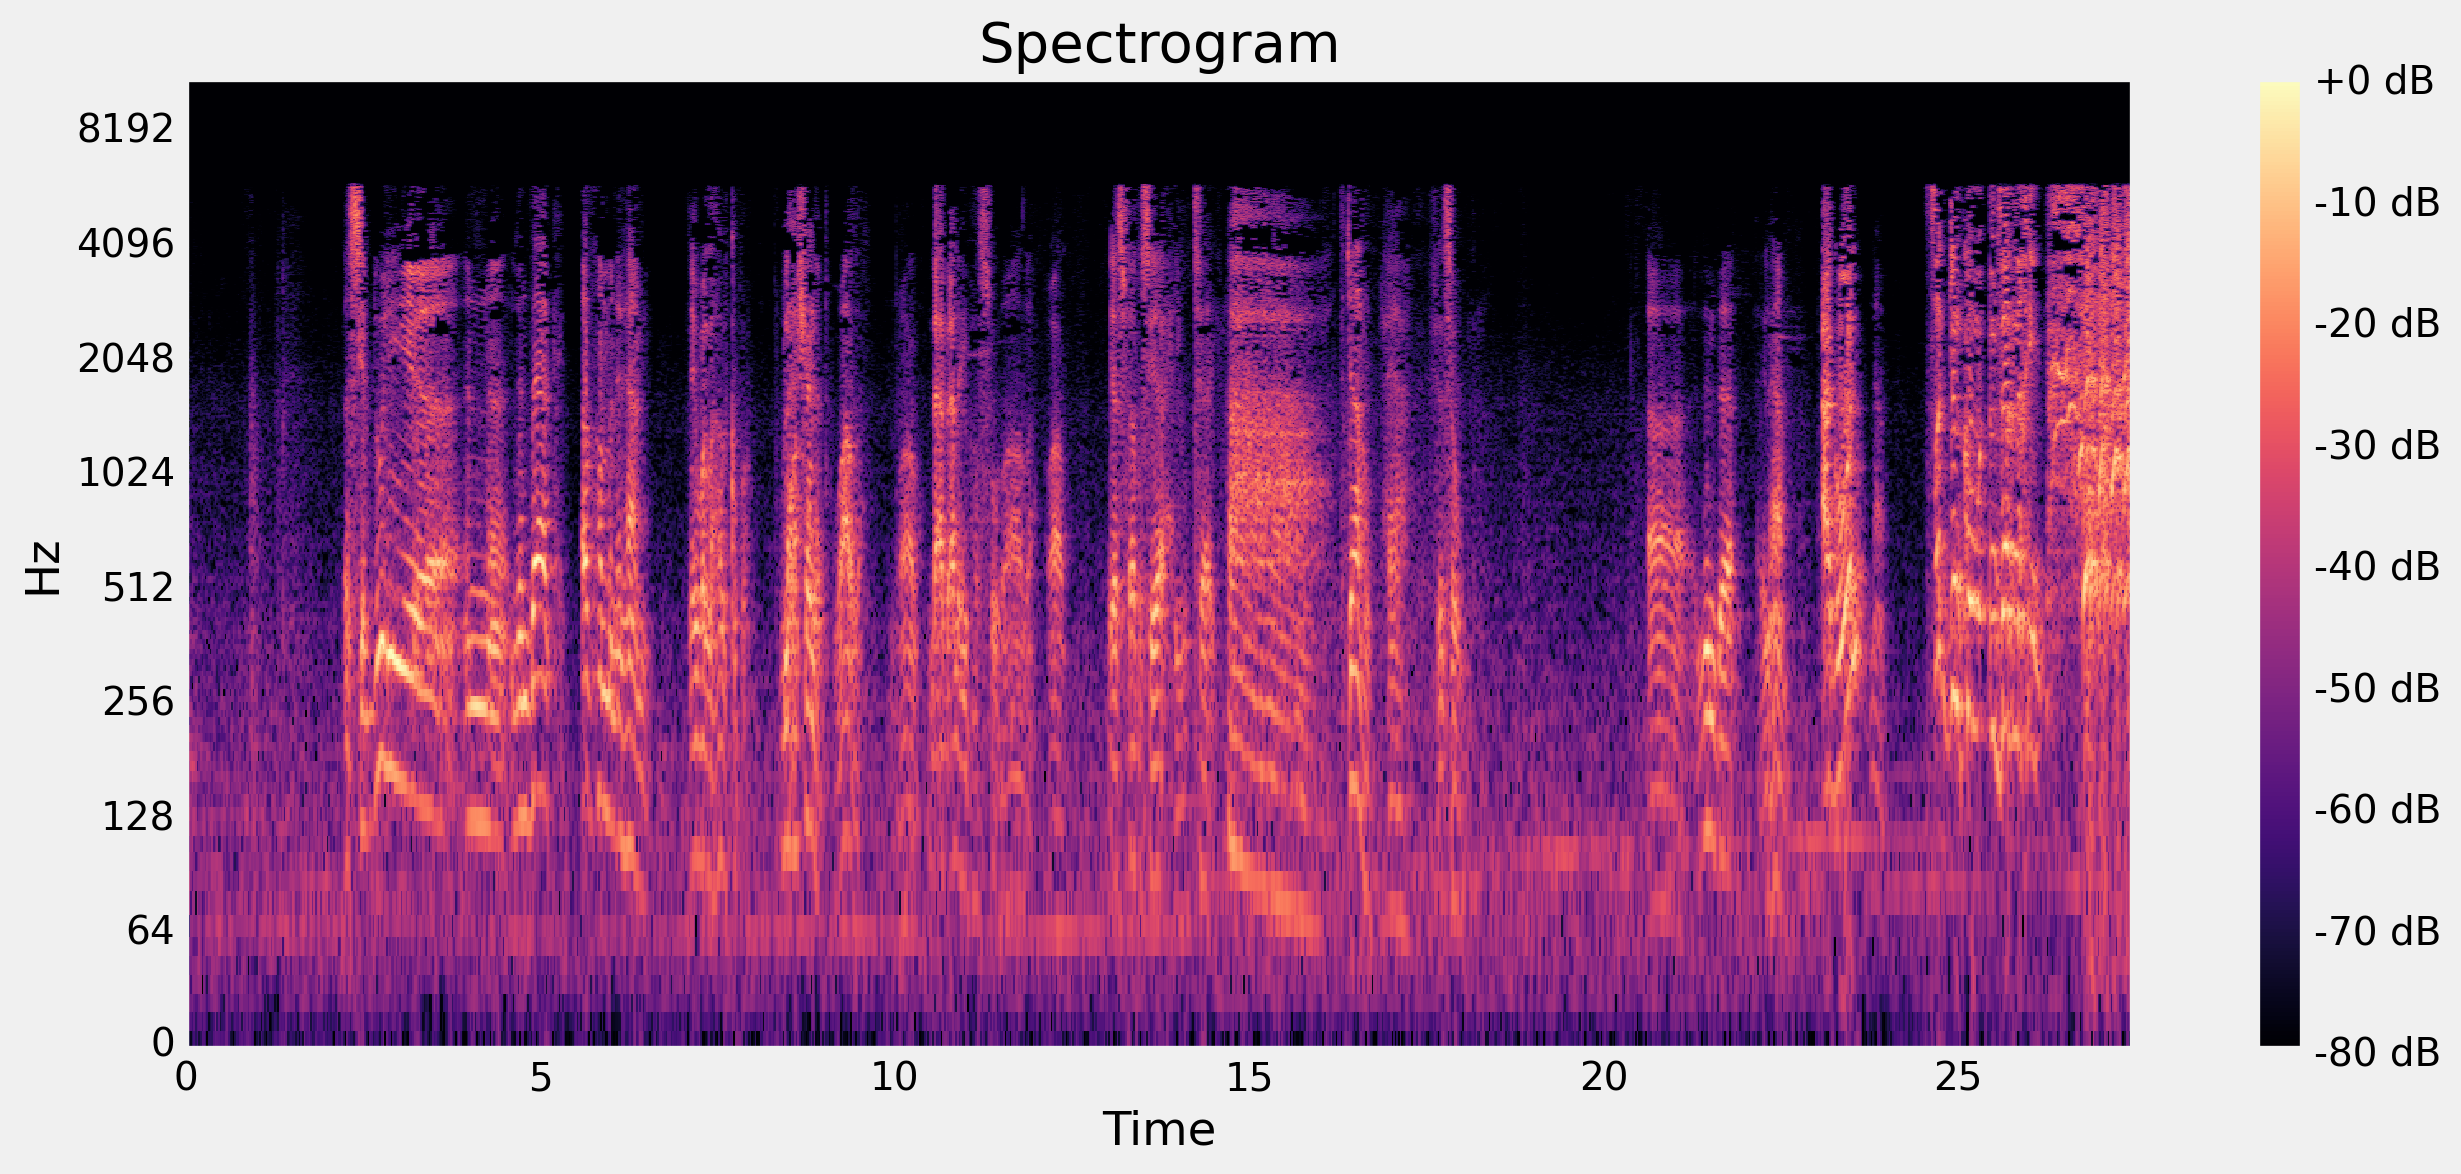

In [16]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
plt.figure(figsize=(14, 6))
librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [17]:
# Analyze transcription content (top 10 most common words)
from collections import Counter
import re

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

train_data['tokens'] = train_data['GroundTruthText'].apply(tokenize)
test_data['tokens'] = test_data['GroundTruthText'].apply(tokenize)
valid_data['tokens'] = valid_data['GroundTruthText'].apply(tokenize)

all_tokens = list(train_data['tokens']) + list(test_data['tokens']) + list(valid_data['tokens'])
word_counter = Counter(token for tokens in all_tokens for token in tokens)

# Print the top 10 most common words
print("Top 10 most common words:")
for word, count in word_counter.most_common(10):
    print(f"{word}: {count}")


Top 10 most common words:
يا: 30187
ما: 25041
في: 17059
أنا: 15304
الله: 13847
من: 13597
لا: 11640
على: 9227
هذا: 8201
بس: 7191


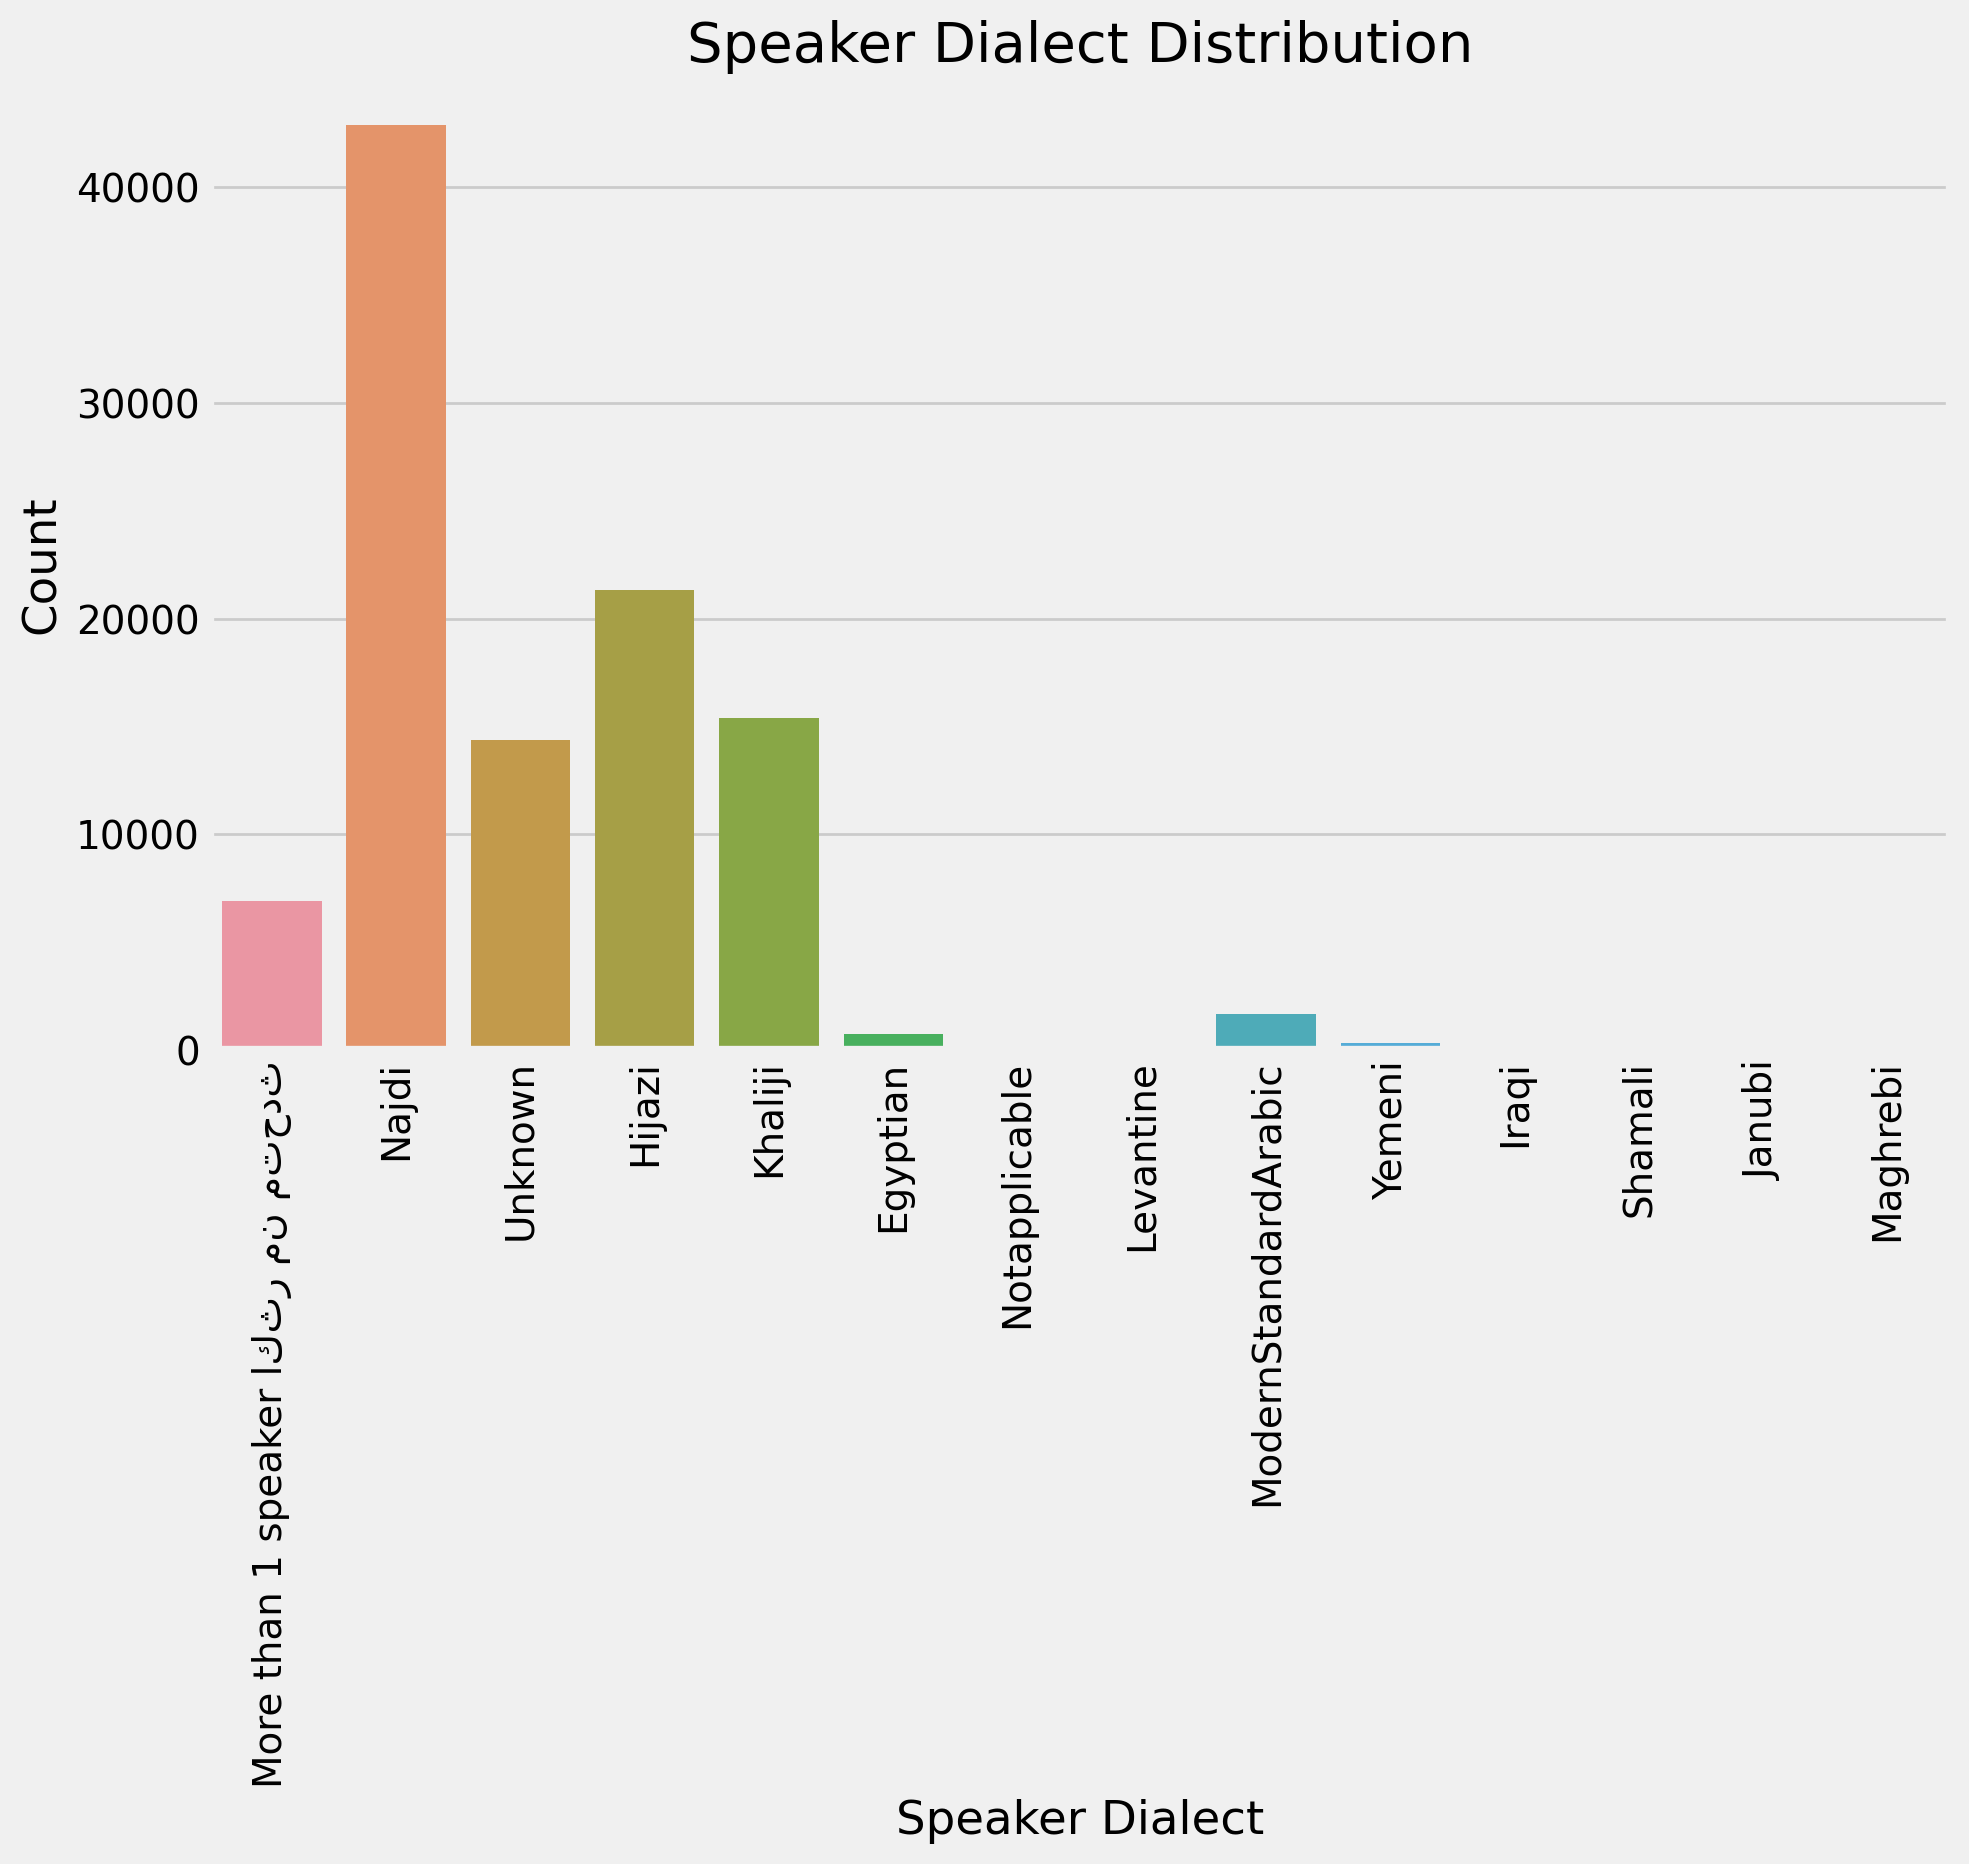

In [18]:
# Plot speaker dialect distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="SpeakerDialect", data=data)
plt.title('Speaker Dialect Distribution')
plt.xlabel('Speaker Dialect')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

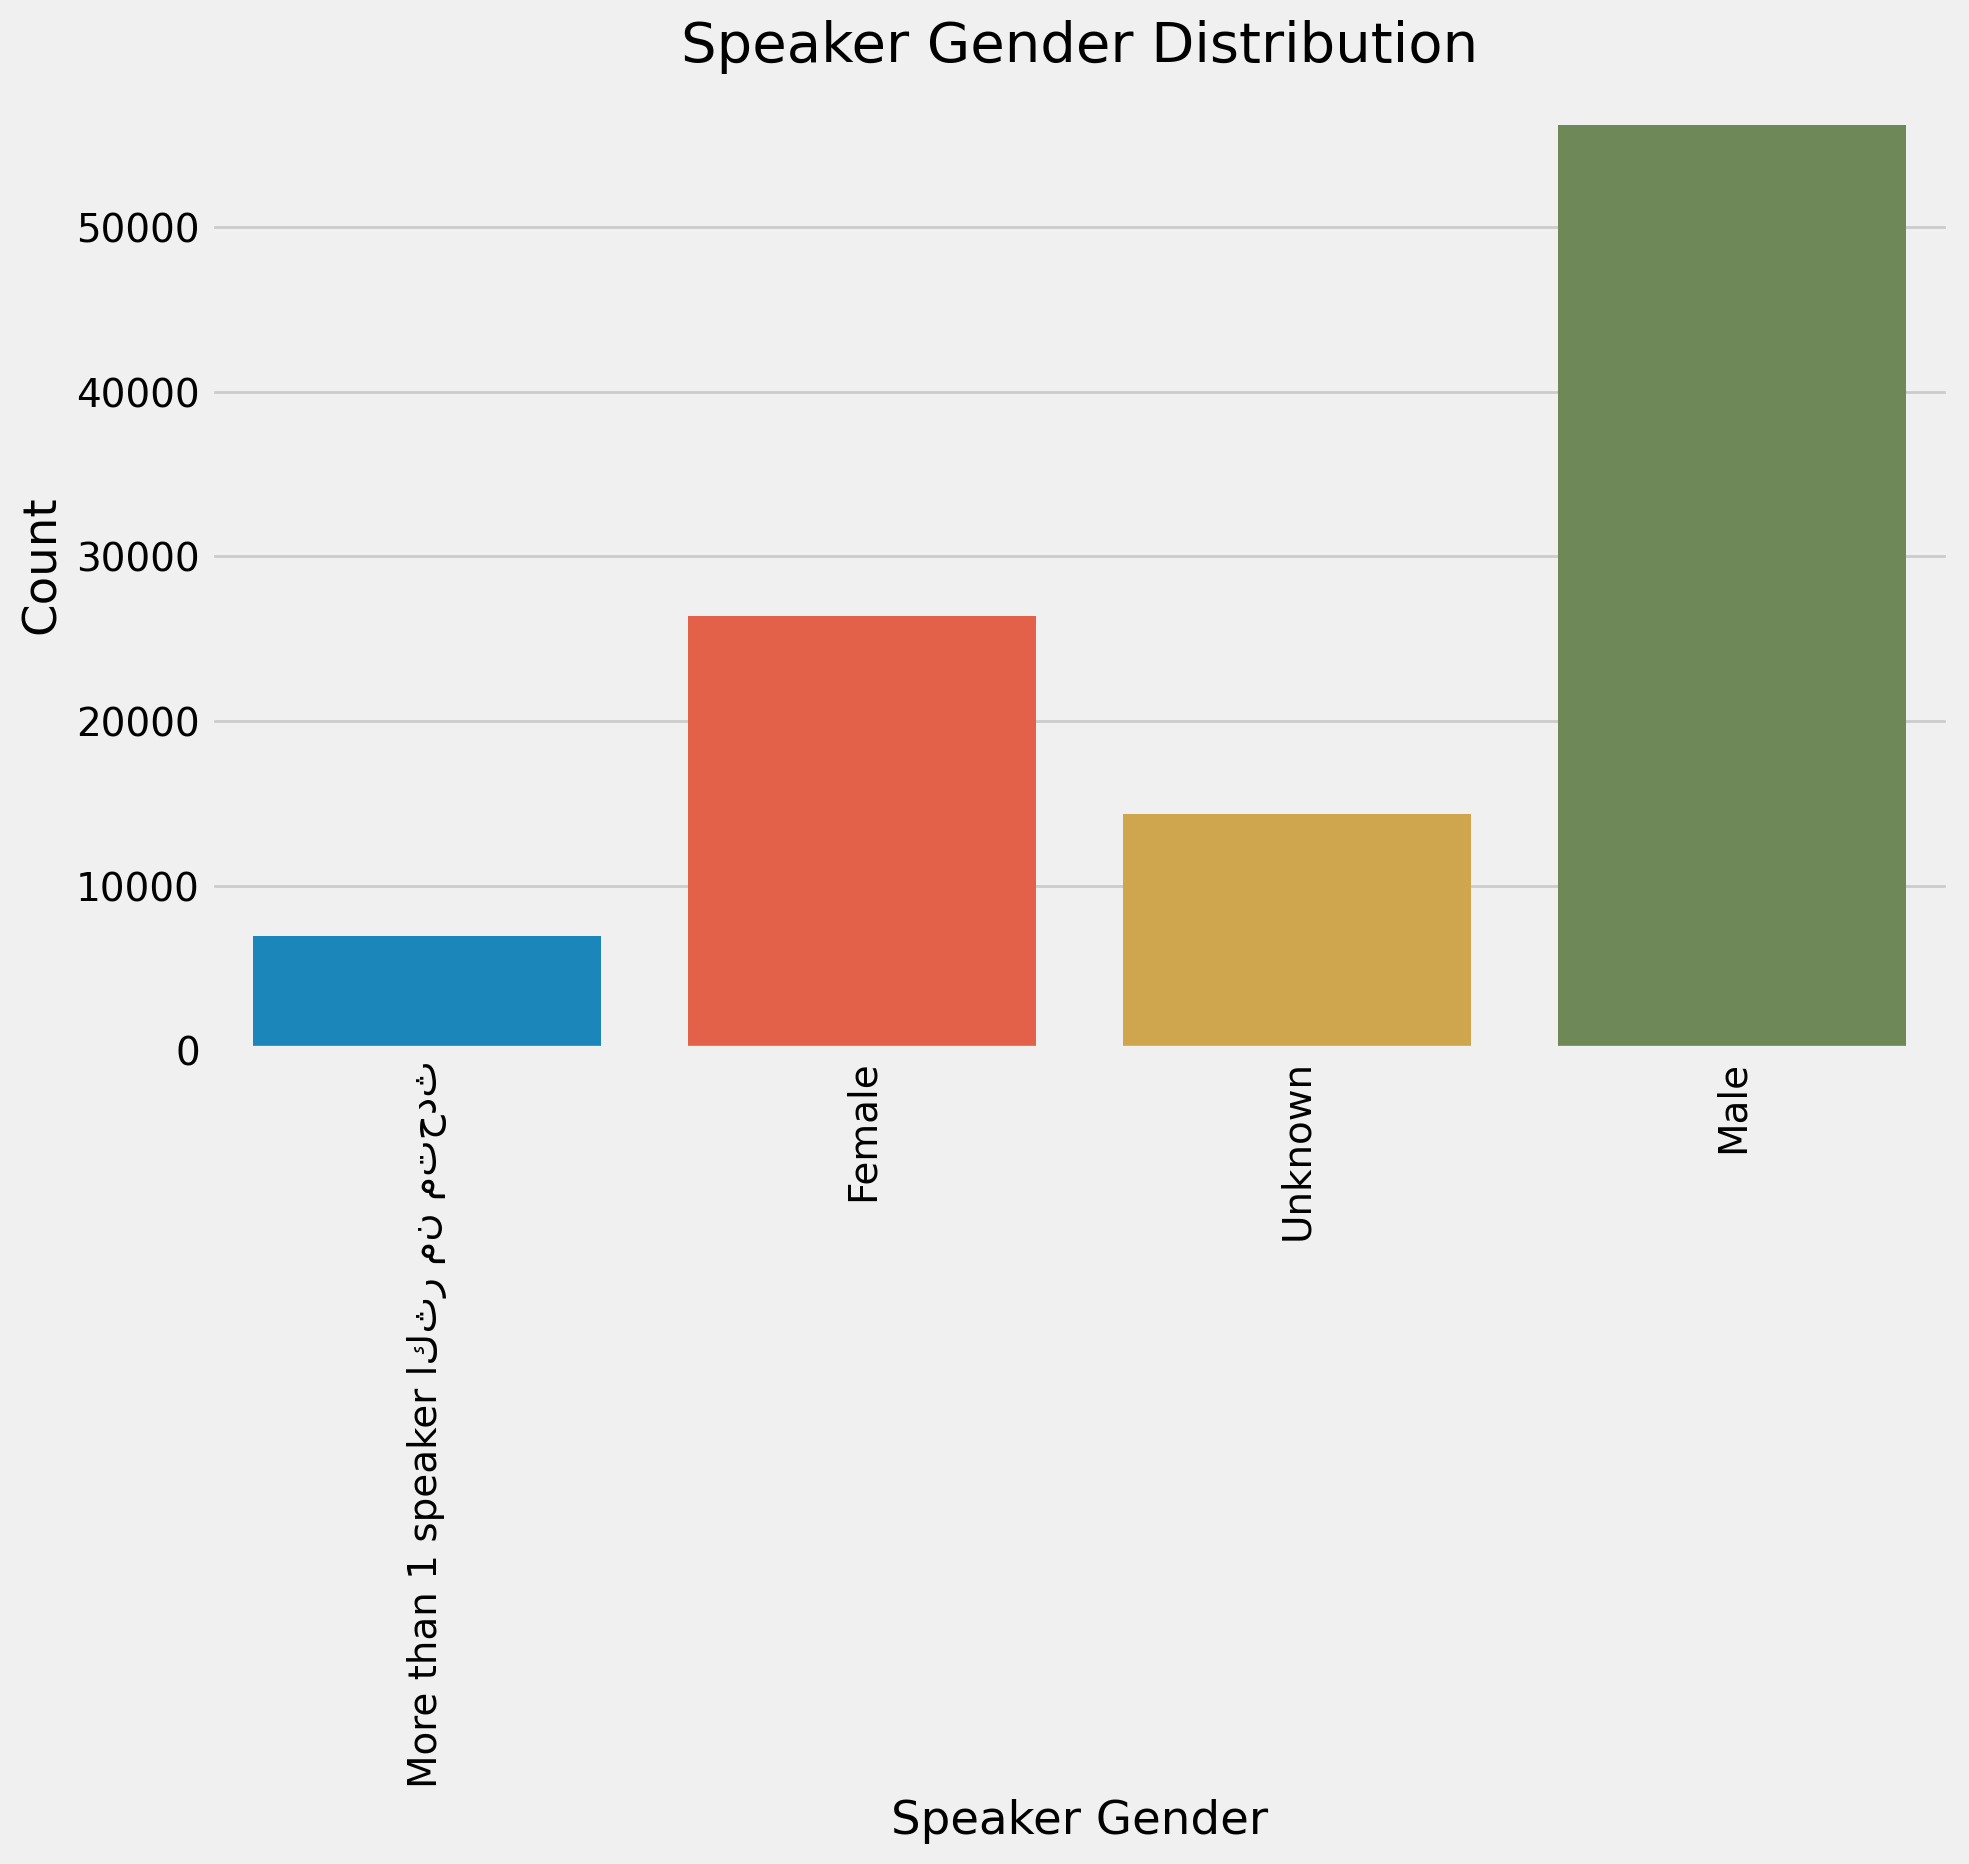

In [19]:
# Plot speaker gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="SpeakerGender", data=data)
plt.title('Speaker Gender Distribution')
plt.xlabel('Speaker Gender')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

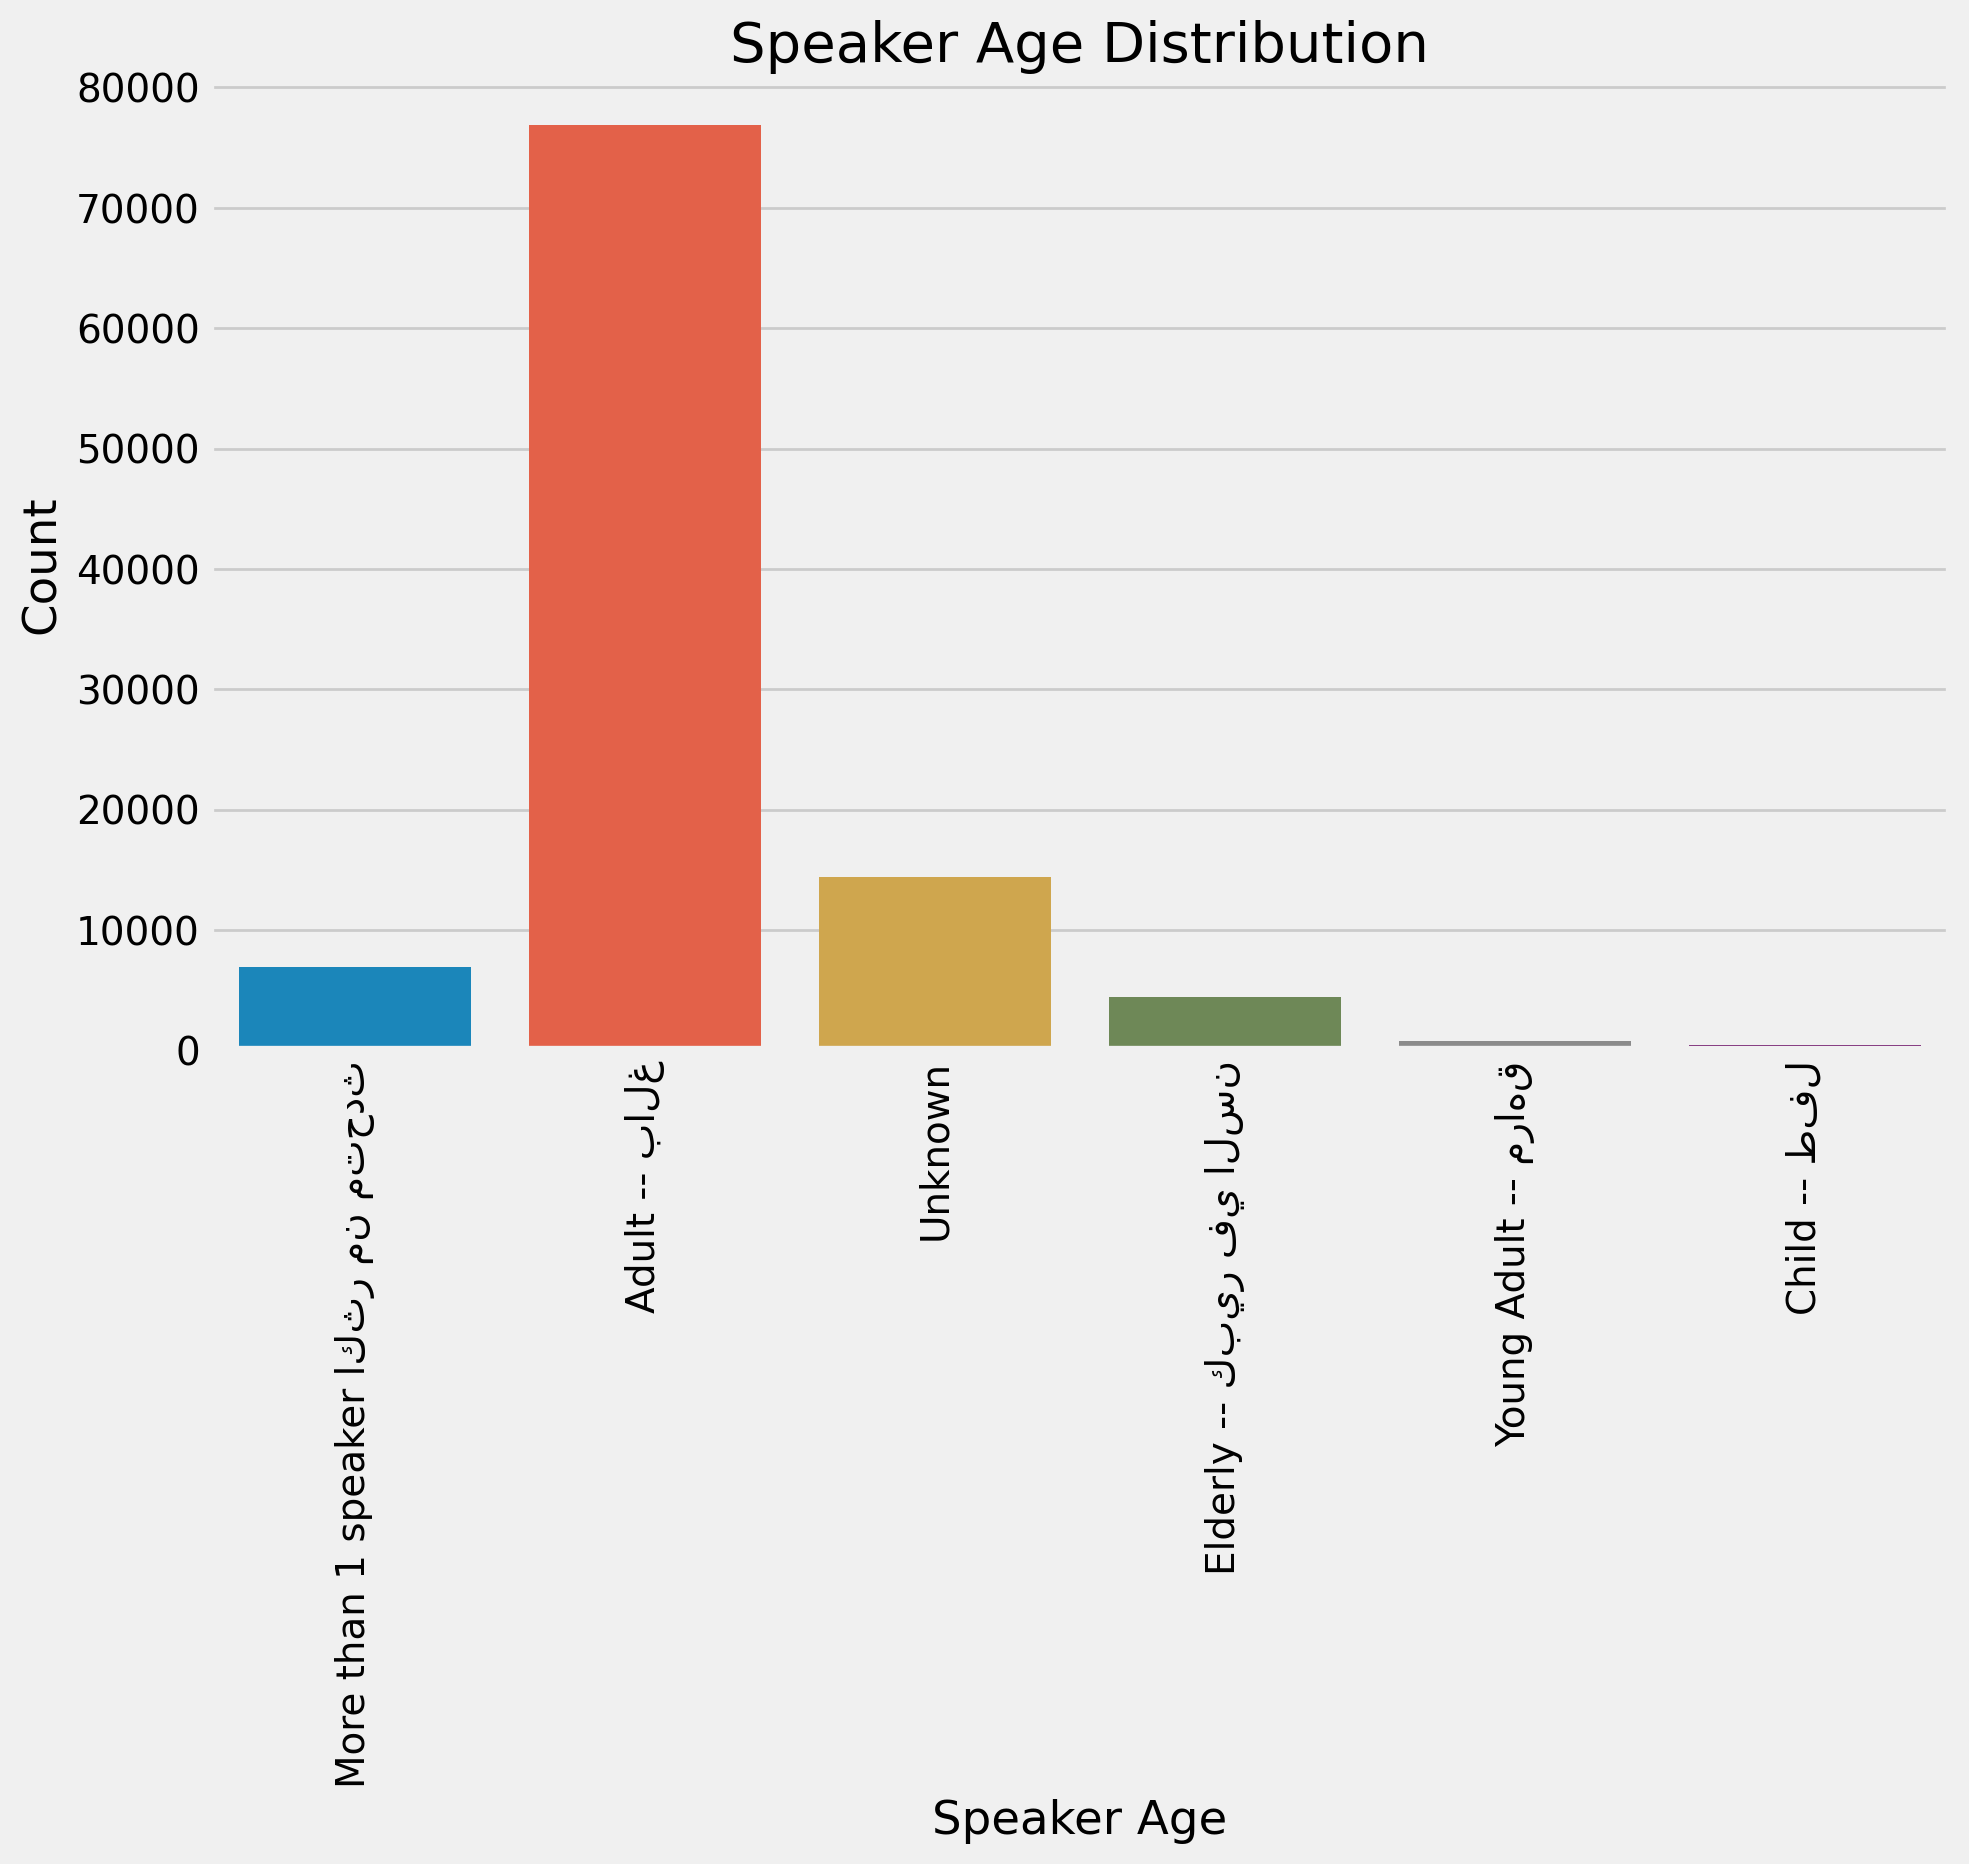

In [20]:
# Plot speaker age distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="SpeakerAge", data=data)
plt.title('Speaker Age Distribution')
plt.xlabel('Speaker Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

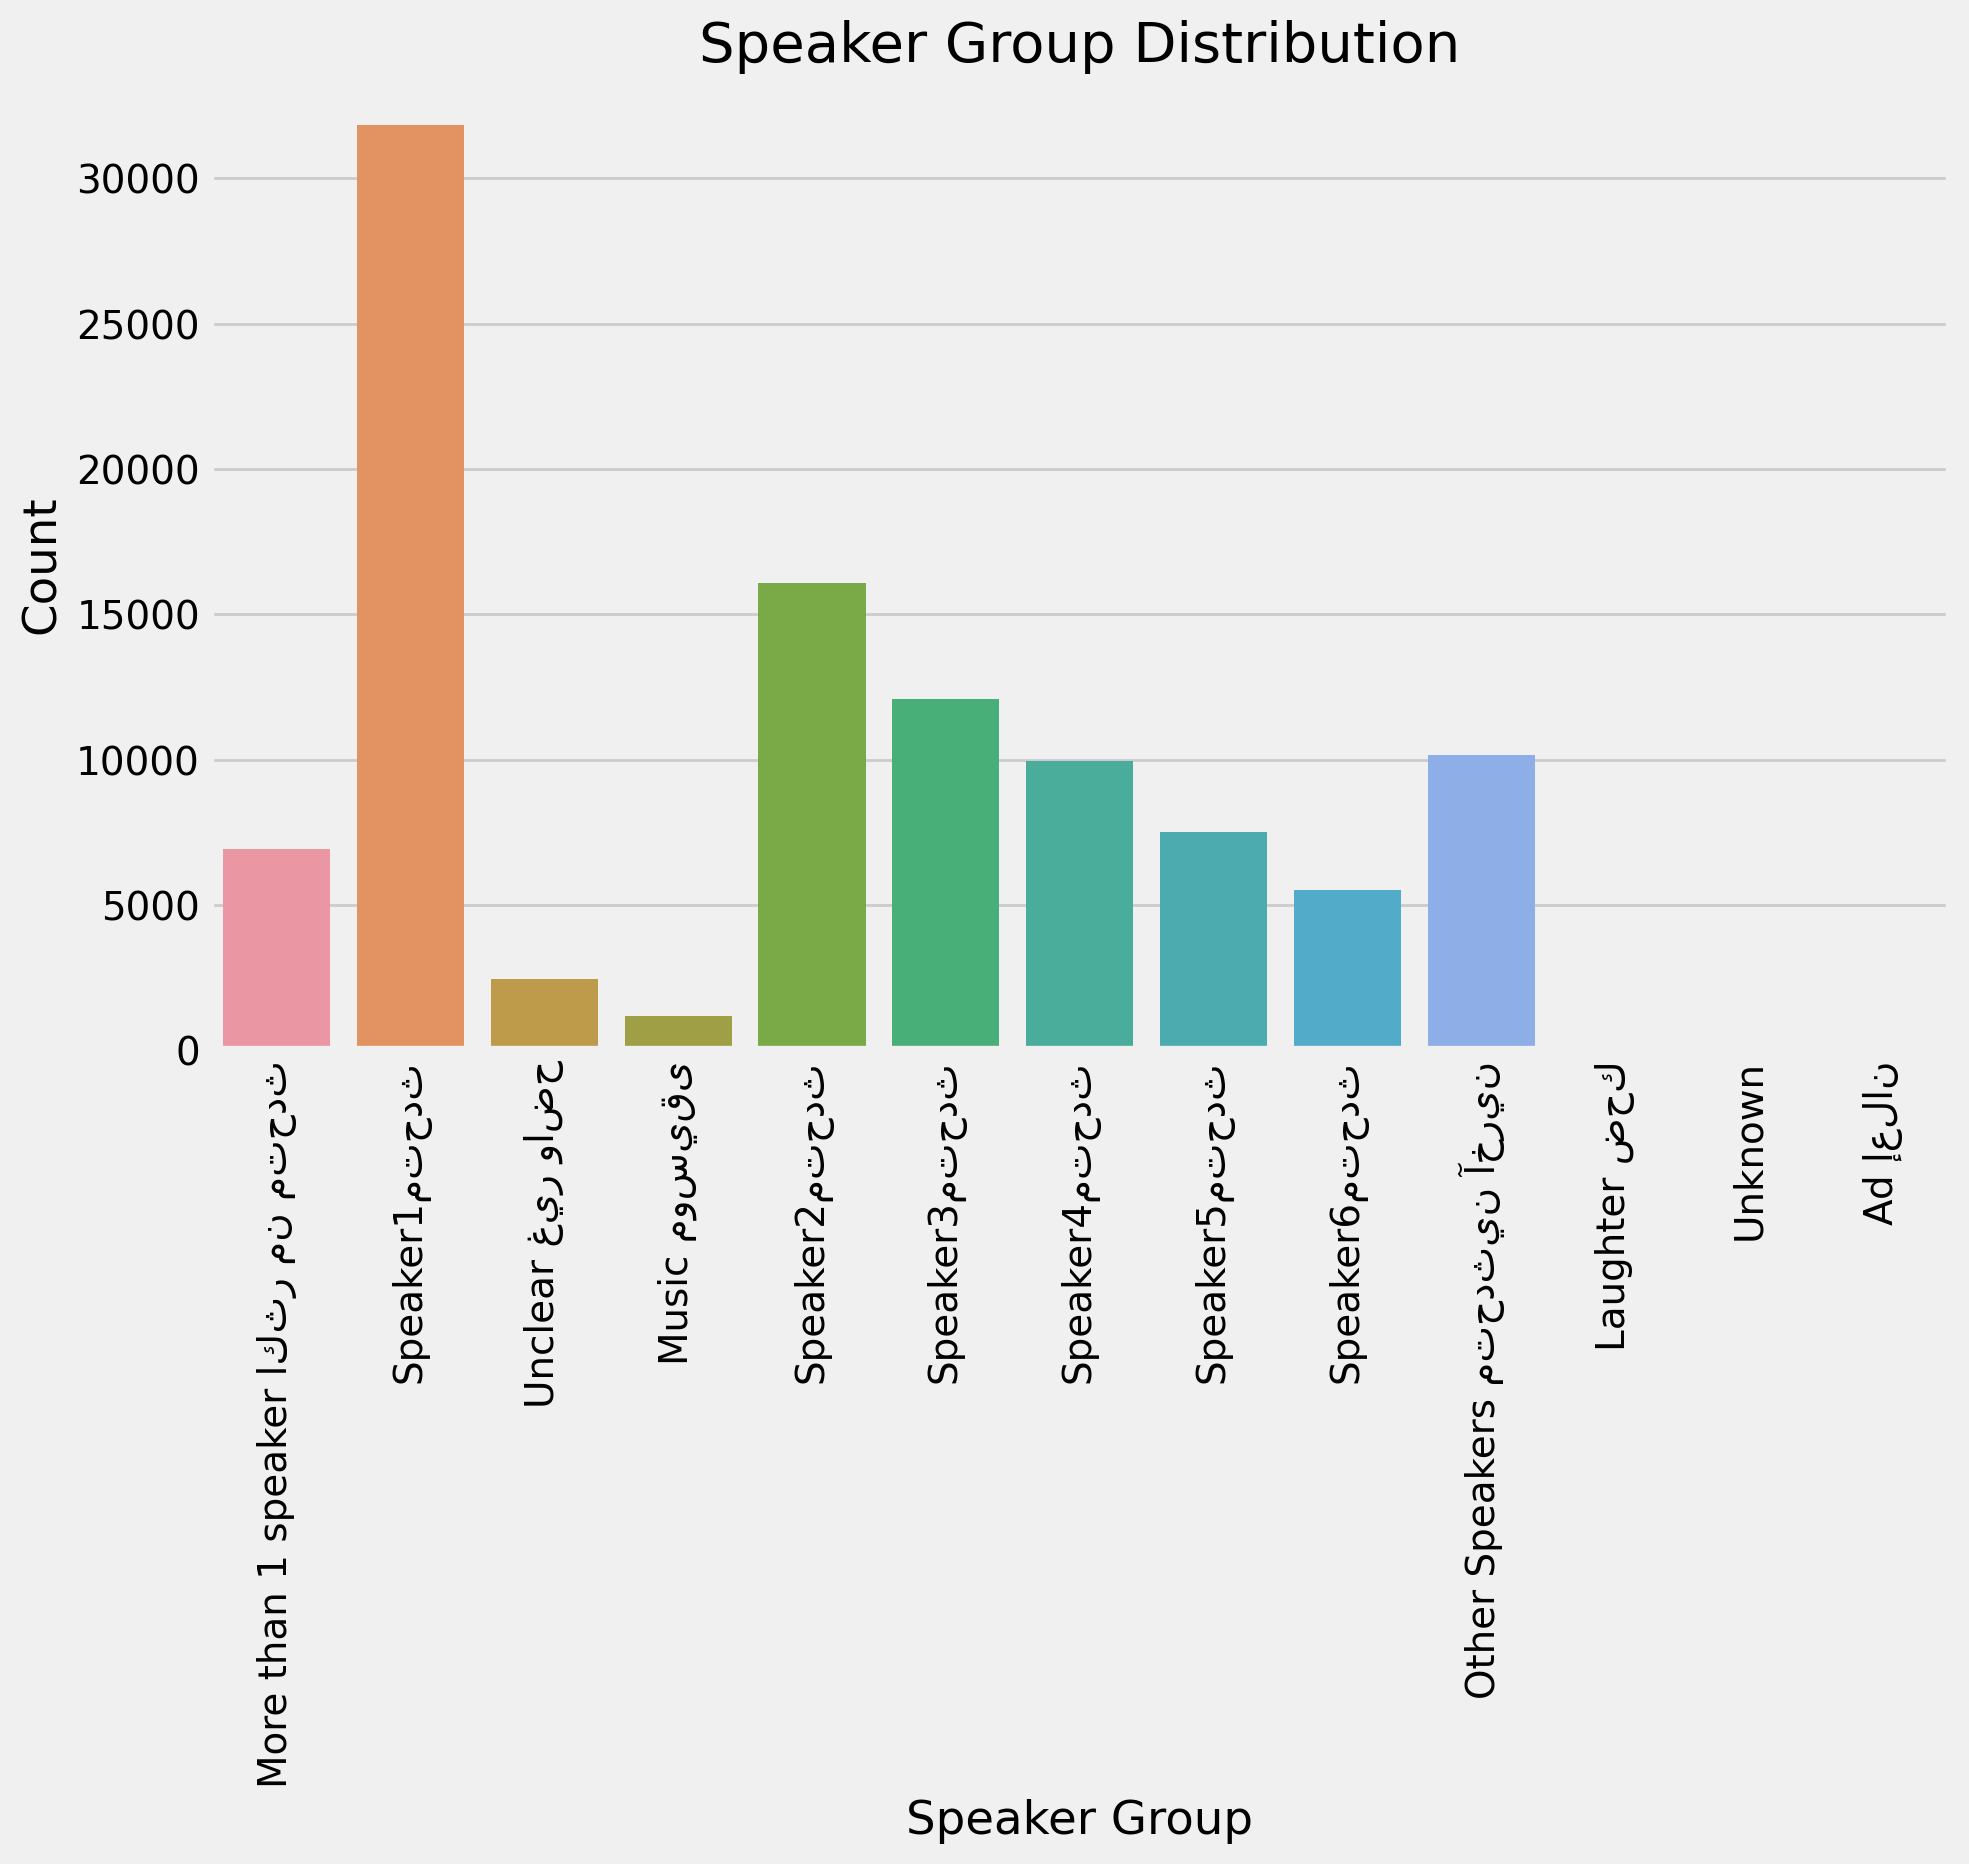

In [21]:
# Plot speaker group distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Speaker", data=data)
plt.title('Speaker Group Distribution')
plt.xlabel('Speaker Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [22]:
print("SpeakerAge value counts:")
print(data['SpeakerAge'].value_counts())
print("\n")

print("Speaker value counts:")
print(data['Speaker'].value_counts())
print("\n")

print("SpeakerGender value counts:")
print(data['SpeakerGender'].value_counts())
print("\n")

print("SpeakerDialect value counts:")
print(data['SpeakerDialect'].value_counts())

SpeakerAge value counts:
Adult -- بالغ                        76918
Unknown                              14428
More than 1 speaker اكثر من متحدث     6915
Elderly -- كبير في السن               4416
Young Adult -- مراهق                   806
Child -- طفل                           412
Name: SpeakerAge, dtype: int64


Speaker value counts:
Speaker1متحدث                        31853
Speaker2متحدث                        16063
Speaker3متحدث                        12083
Other Speakers متحدثين آخرين         10153
Speaker4متحدث                         9953
Speaker5متحدث                         7500
More than 1 speaker اكثر من متحدث     6915
Speaker6متحدث                         5528
Unclear غير واضح                      2458
Music موسيقى                          1188
Laughter ضحك                           164
Ad إعلان                                19
Unknown                                 18
Name: Speaker, dtype: int64


SpeakerGender value counts:
Male                                 56233
Fe

In [23]:
# Remove samples with the 'Car' environment
data = data[data['Environment'] != 'Car -- سيارة']

# Print the value counts for the Environment variable after removing 'Car' samples
print("Environment value counts:")
print(data['Environment'].value_counts())


Environment value counts:
Music -- موسيقى    36434
Noisy -- ضوضاء     36221
Clean -- نظيف      31114
Name: Environment, dtype: int64


In [24]:
print("Environment value counts:")
print(data['Environment'].value_counts())


Environment value counts:
Music -- موسيقى    36434
Noisy -- ضوضاء     36221
Clean -- نظيف      31114
Name: Environment, dtype: int64


In [25]:
value_counts = data['Speaker'].value_counts()

In [26]:
print("Laughter ضحك:", value_counts['Laughter ضحك'])
print("Unclear غير واضح:", value_counts['Unclear غير واضح'])
print("Music موسيقى:", value_counts['Music موسيقى'])


Laughter ضحك: 164
Unclear غير واضح: 2454
Music موسيقى: 1188


# Based on our EDA result we have encountered few issues. 
1. The dataset is heavily skewed towards adult speakers, with fewer young adults, elderly, and children.
2. There are several instances of More than 1 speaker and unclear
3. Imbalanced in speaker gender 
4. There are non speech audio such as music and laughter needs to be handled.

In [27]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [29]:
# Removing non speakers in Speaker column
data = data [~data['Speaker'].isin(['Music موسيقى', 'Laughter ضحك', 'Unclear غير واضح'])]

In [30]:
# function to balance the dataset
def balance_data(data, column_name):
    le = LabelEncoder()
    data[f'{column_name}_encoded'] = le.fit_transform(data[column_name])
    
    over_sampling_strategy = 'auto'
    under_sampling_strategy = 'majority'
    
    pipeline = Pipeline([
        ('over', RandomOverSampler(sampling_strategy=over_sampling_strategy)),
        ('under', RandomUnderSampler(sampling_strategy=under_sampling_strategy))
    ])
    
    data_resampled, y_resampled = pipeline.fit_resample(data, data[f'{column_name}_encoded'])
    data_resampled[column_name] = le.inverse_transform(y_resampled)
    
    return data_resampled


In [31]:
# Balance the data for each variable
data_resampled_speaker_age = balance_data(data, 'SpeakerAge')
data_resampled_speaker = balance_data(data_resampled_speaker_age, 'Speaker')
data_resampled_speaker_gender = balance_data(data_resampled_speaker, 'SpeakerGender')

<ipython-input-30-2d83122664cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{column_name}_encoded'] = le.fit_transform(data[column_name])


In [32]:
# Print the value counts for each variable after balancing
print("After resampling:")
print("SpeakerAge value counts:")
print(data_resampled_speaker_gender['SpeakerAge'].value_counts())
print("\nSpeaker value counts:")
print(data_resampled_speaker_gender['Speaker'].value_counts())
print("\nSpeakerGender value counts:")
print(data_resampled_speaker_gender['SpeakerGender'].value_counts())

After resampling:
SpeakerAge value counts:
Unknown                              345743
More than 1 speaker اكثر من متحدث    344564
Child -- طفل                         185180
Adult -- بالغ                        182187
Young Adult -- مراهق                 167054
Elderly -- كبير في السن              153528
Name: SpeakerAge, dtype: int64

Speaker value counts:
More than 1 speaker اكثر من متحدث    344564
Speaker3متحدث                        123745
Speaker2متحدث                        123725
Speaker4متحدث                        114107
Speaker1متحدث                        113394
Other Speakers متحدثين آخرين         113017
Ad إعلان                             112997
Unknown                              112993
Speaker6متحدث                        111268
Speaker5متحدث                        108446
Name: Speaker, dtype: int64

SpeakerGender value counts:
Female                               344564
Male                                 344564
More than 1 speaker اكثر من متحدث    344564
Unknown   

In [34]:
data = data_resampled_speaker_gender


In [36]:
data.columns

Index(['FileName', 'ShowName', 'FullFileLength', 'SegmentID', 'SegmentLength',
       'SegmentStart', 'SegmentEnd', 'SpeakerAge', 'SpeakerGender',
       'SpeakerDialect', 'Speaker', 'Environment', 'GroundTruthText',
       'ProcessedText', 'split', 'transcript_length', 'SpeakerAge_encoded',
       'Speaker_encoded', 'SpeakerGender_encoded'],
      dtype='object')

In [37]:
print(data['FileName'].head(30))

0          batch_4/6k_v_SBA_345_0.wav
1         batch_3/6k_v_SBA_1684_0.wav
2          batch_4/6k_v_SBA_259_1.wav
3        batch_2/6k_v_SBA3_2636_0.wav
4        batch_2/6k_v_SBA3_2636_0.wav
5          batch_4/6k_v_SBA_337_0.wav
6          batch_4/6k_v_SBA_345_0.wav
7         batch_3/6k_v_SBA_1684_0.wav
8          batch_4/6k_v_SBA_259_1.wav
9        batch_2/6k_v_SBA3_2500_2.wav
10            batch_1/6k_SBA_57_1.wav
11        batch_3/6k_v_SBA_1859_1.wav
12         batch_4/6k_v_SBA_798_1.wav
13    batch_1/6k_v2ms_SBA3_2811_0.wav
14         batch_4/6k_v_SBA_919_1.wav
15           batch_1/6k_SBA_135_1.wav
16         batch_4/6k_v_SBA_260_1.wav
17         batch_4/6k_v_SBA_281_5.wav
18         batch_4/6k_v_SBA_345_0.wav
19         batch_4/6k_v_SBA_259_1.wav
20        batch_3/6k_v_SBA_1684_0.wav
21         batch_4/6k_v_SBA_509_2.wav
22         batch_4/6k_v_SBA_259_1.wav
23       batch_2/6k_v_SBA3_2546_0.wav
24         batch_4/6k_v_SBA_892_0.wav
25       batch_2/6k_v_SBA3_2690_2.wav
26         b

### Segement audio to speaker dialect

In [39]:
def process_audio_data(data, remove_values):
    data = data[data["SpeakerAge"] != "Unknown"]
    data = data[data["SpeakerGender"] != "Unknown"]
    data = data[~data["SpeakerDialect"].isin(remove_values)]

    data["SpeakerAge"] = data["SpeakerAge"].apply(lambda x: x.split(" --")[0])
    data["Environment"] = data["Environment"].apply(lambda x: x.split(" --")[0])

    data["is_segmented"] = data["FileName"].apply(lambda x: "segmented" in x)

    # Process only the first 30 rows
    data = data.head(30)

    print(f"Processing {len(data)} rows...")

    for idx, row in data.iterrows():
        print(f"Processing row {idx}:")
        relative_path = row["FileName"]
        print(f"Found relative path: {relative_path}")
        data.at[idx, "relative_path"] = relative_path

    return data.reset_index(drop=True)



In [44]:
from IPython.display import Audio

def display(data, dialect):
    filtered_df = data[data["SpeakerDialect"] == dialect]
    random_row = filtered_df.sample(n=1).iloc[0]

    print(f"ShowName: {random_row['ShowName']}\n"
          f"ProcessedText: {random_row['ProcessedText']}\n"
          f"SpeakerGender: {random_row['SpeakerGender']}\n"
          f"SpeakerAge: {random_row['SpeakerAge']}\n"
          f"SpeakerDialect: {random_row['SpeakerDialect']}")

    base_path = '/content/drive/MyDrive/SADA_DATASETS/batch_4/6k_v_SBA_892_0.wav'

    relative_path = random_row['relative_path']
    absolute_audio_path = os.path.join(base_path, relative_path)

    print(f"Trying to load audio file: {absolute_audio_path}")

    if not os.path.exists(absolute_audio_path):
        print("Audio file not found.")
        return

    audio_waveform, sr = librosa.load(absolute_audio_path)

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

    X = librosa.stft(audio_waveform)
    Xdb = librosa.amplitude_to_db(abs(X))
    img = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax=ax[0])
    ax[0].set(title='Spectrogram')
    fig.colorbar(img, ax=ax[0], format="%+2.f dB")

    times = np.arange(len(audio_waveform)) / float(sr)
    ax[1].plot(times, audio_waveform)
    ax[1].set(xlabel='Time (s)', ylabel='Amplitude', title='Waveform')
    plt.show()

    return Audio(audio_waveform, rate=sr, autoplay=True)




In [45]:
remove_values = [] 
processed_data = process_audio_data(data, remove_values)


In [46]:
display(processed_data, "Hijazi")

ShowName: طفلي لا يفعلها - 22_1
ProcessedText: حلو شكلي حلو
SpeakerGender: Female
SpeakerAge: Child
SpeakerDialect: Hijazi
Trying to load audio file: /content/drive/MyDrive/SADA_DATASETS/batch_1/6k_v2ms_SBA3_2811_0.wav
Audio file not found.
